#Predicting Sleep Quality and Providing Recommendations

# Dataset Overview:

The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

# Dataset Columns:

**Person ID:** An identifier for each individual.

**Gender:** The gender of the person (Male/Female).

**Age:** The age of the person in years.

**Occupation:** The occupation or profession of the person.

**Sleep Duration (hours):** The number of hours the person sleeps per day.

**Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.

**Stress Level (scale: 1-10):** A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

**BMI Category:** The BMI category of the person (e.g., Underweight, Normal, Overweight).

**Blood Pressure (systolic/diastolic):** The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

**Heart Rate (bpm): **The resting heart rate of the person in beats per minute.

**Daily Steps:** The number of steps the person takes per day.

**Sleep Disorder:** The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

#Target Variable

**Quality of Sleep (scale: 1-10):** A subjective rating of the quality of sleep, ranging from 1 to 10.


# Tasks:

**1. Data Preprocessing:**
   - Handle missing values.
   - Encode categorical variables.
   - Check for correlations and address any multicollinearity issues.

**2. Exploratory Data Analysis (EDA):**
   - Perform basic and advanced EDA to understand the relationships between features and the target variable.
   - Visualize patterns and trends in the data.

**3. Feature Engineering:**
   - Create new relevant features based on domain knowledge or feature interactions.
   - Handle any issues identified during the EDA.

**4. Principal Component Analysis (PCA):**
   - Apply PCA to reduce dimensionality.
   - Identify the principal components and their contributions to variance.

**5. Model Selection and Tuning:**
   - Select appropriate machine learning models.
   - Use Grid Search CV for hyperparameter tuning.

**6. Recommendation System:**
   - Develop a recommendation system for improving sleep quality based on feature importance.
   - Provide suggestions for lifestyle changes or adjustments.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info

<bound method DataFrame.info of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6  

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


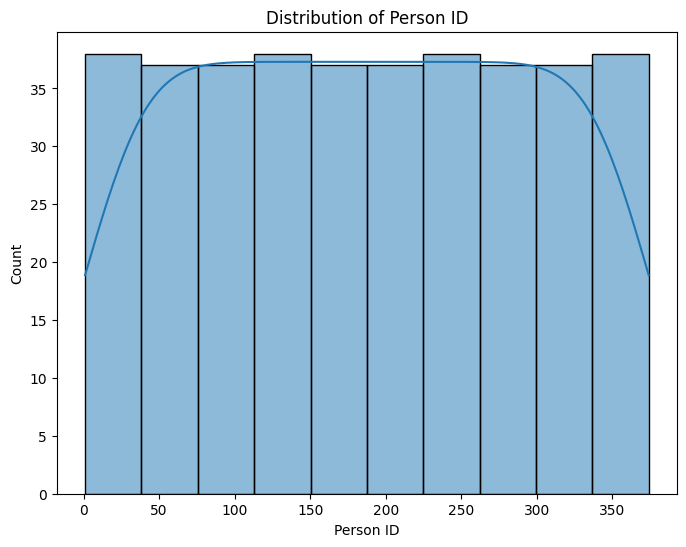

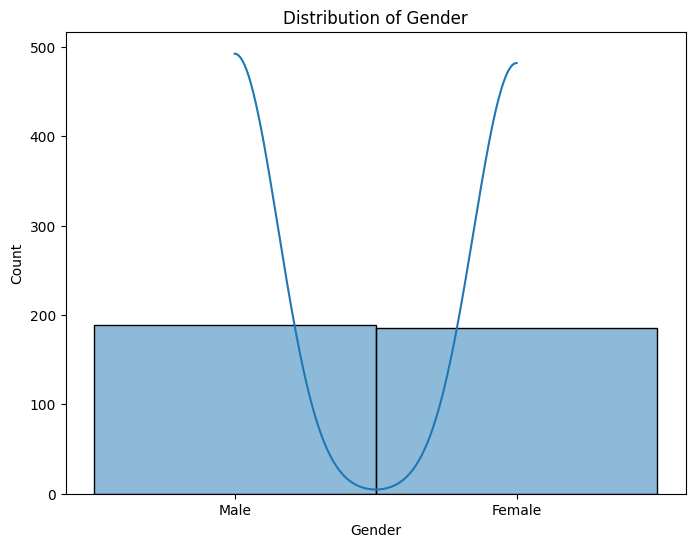

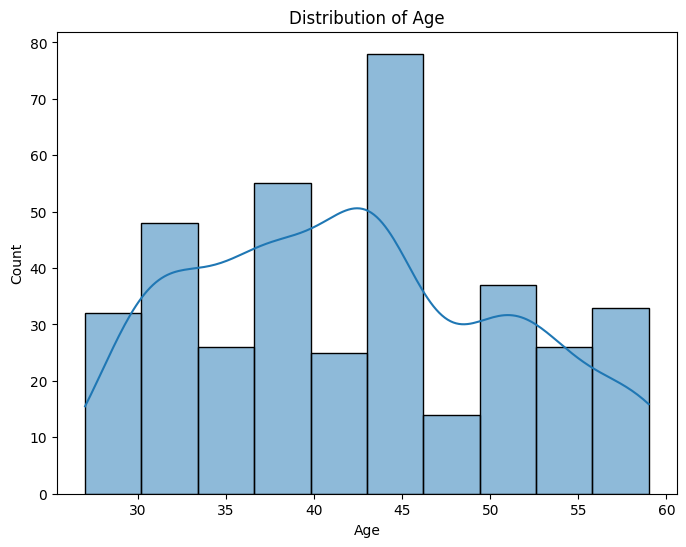

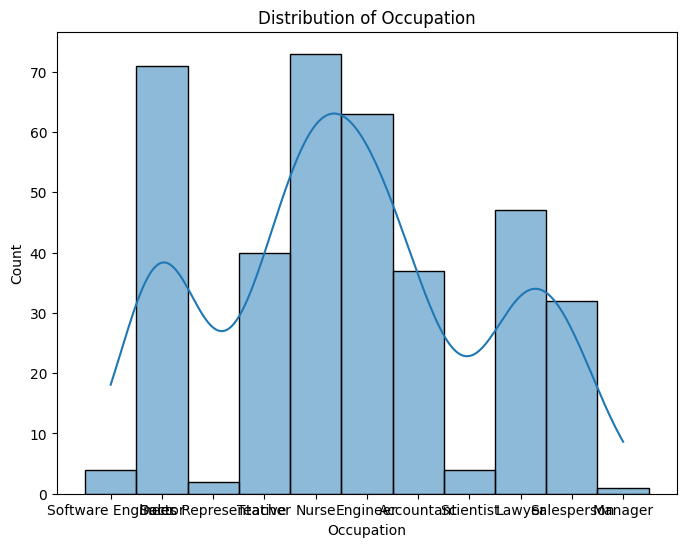

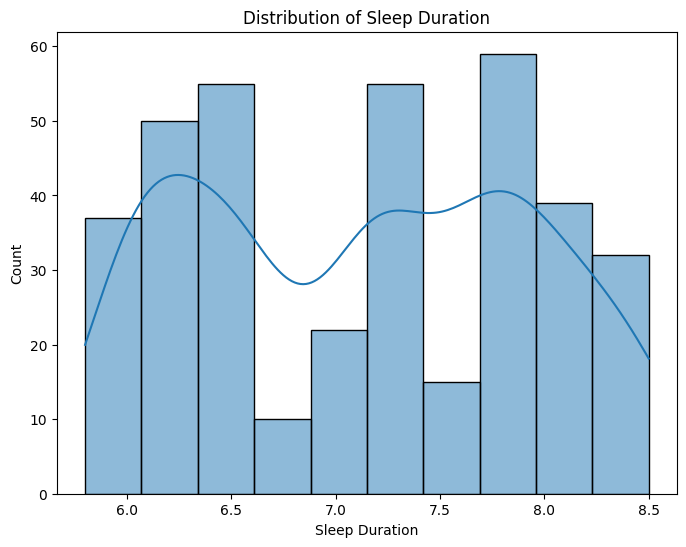

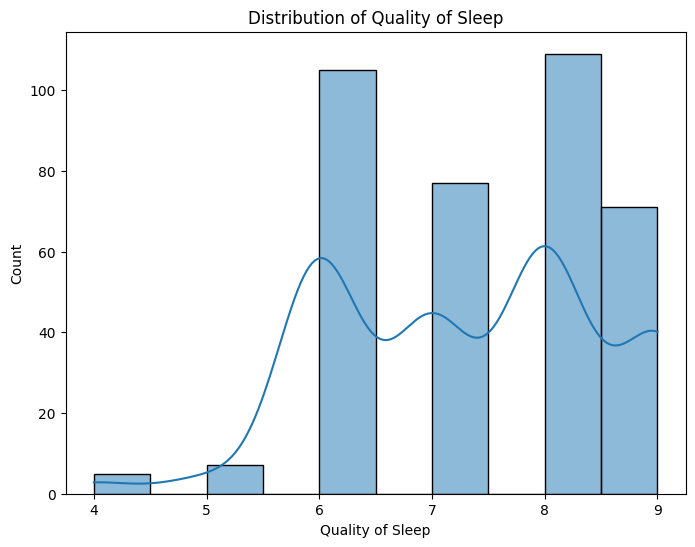

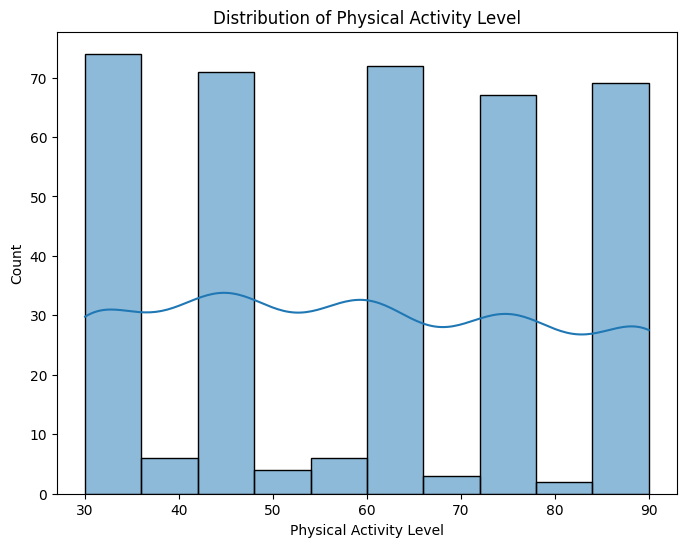

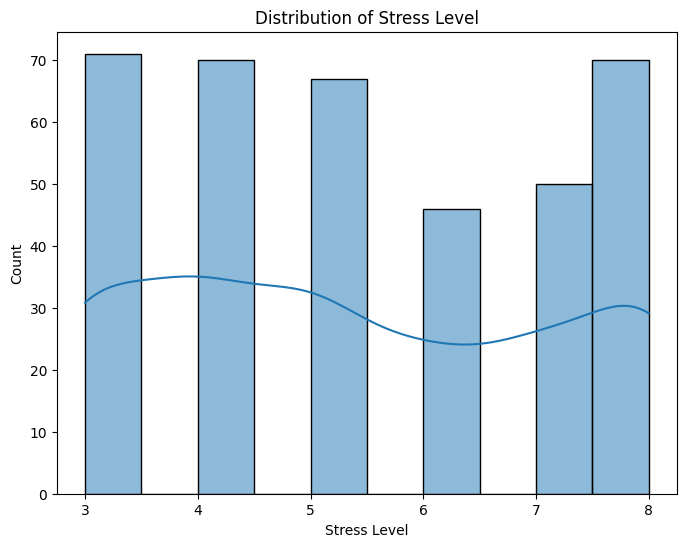

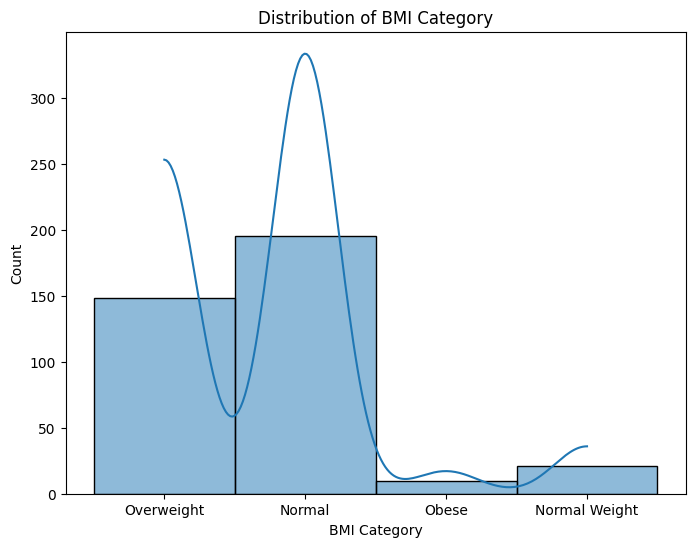

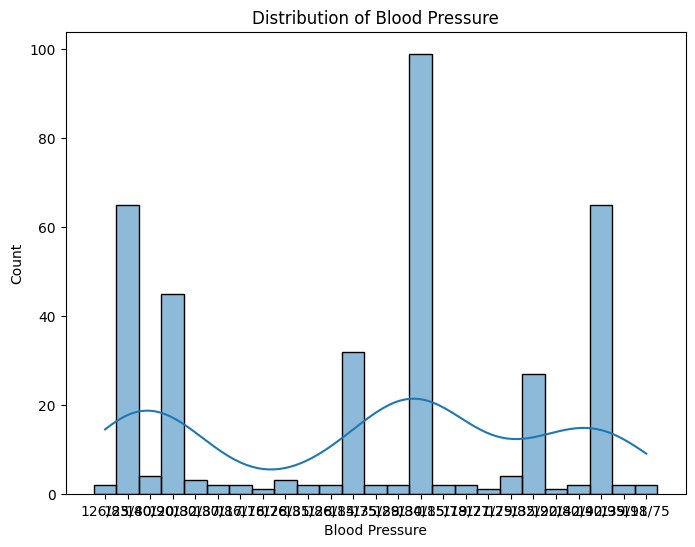

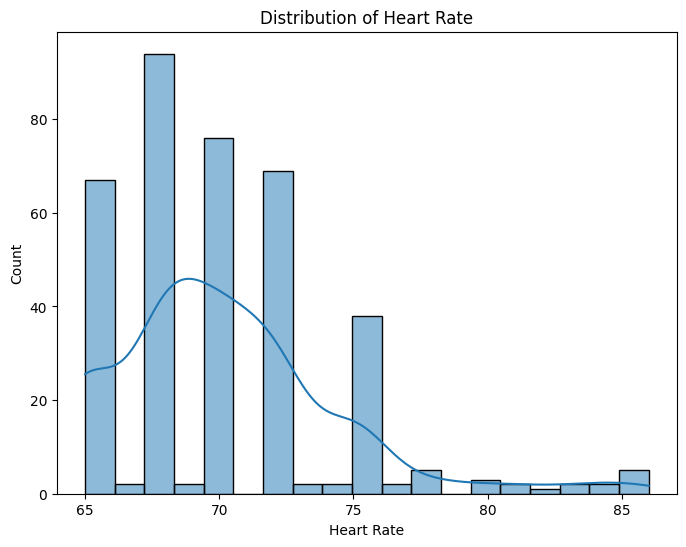

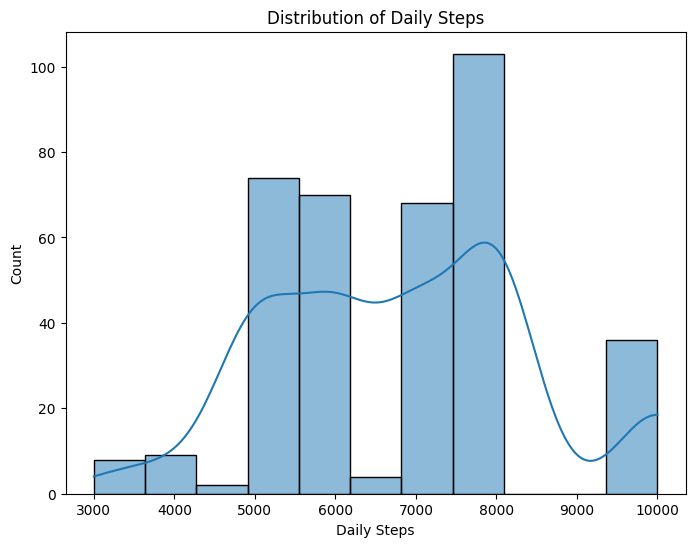

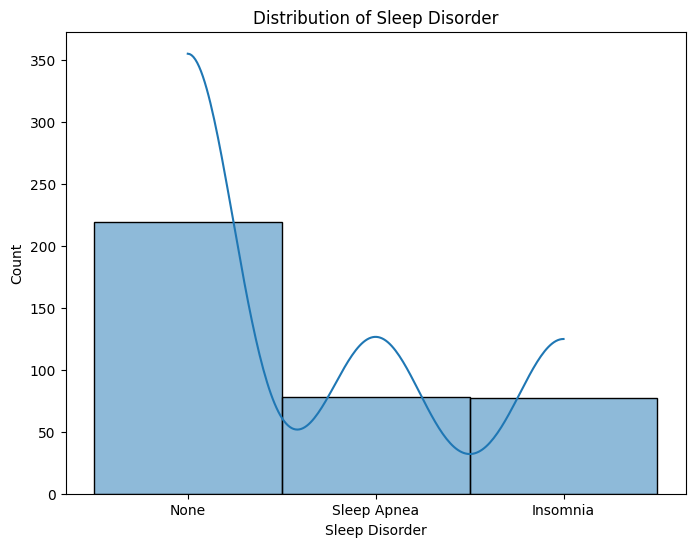

In [ ]:
for column in df.columns:
  plt.figure(figsize=(8,6))
  sns.histplot(df[column],kde=True)
  plt.title(f'Distribution of {column}')
  plt.show()


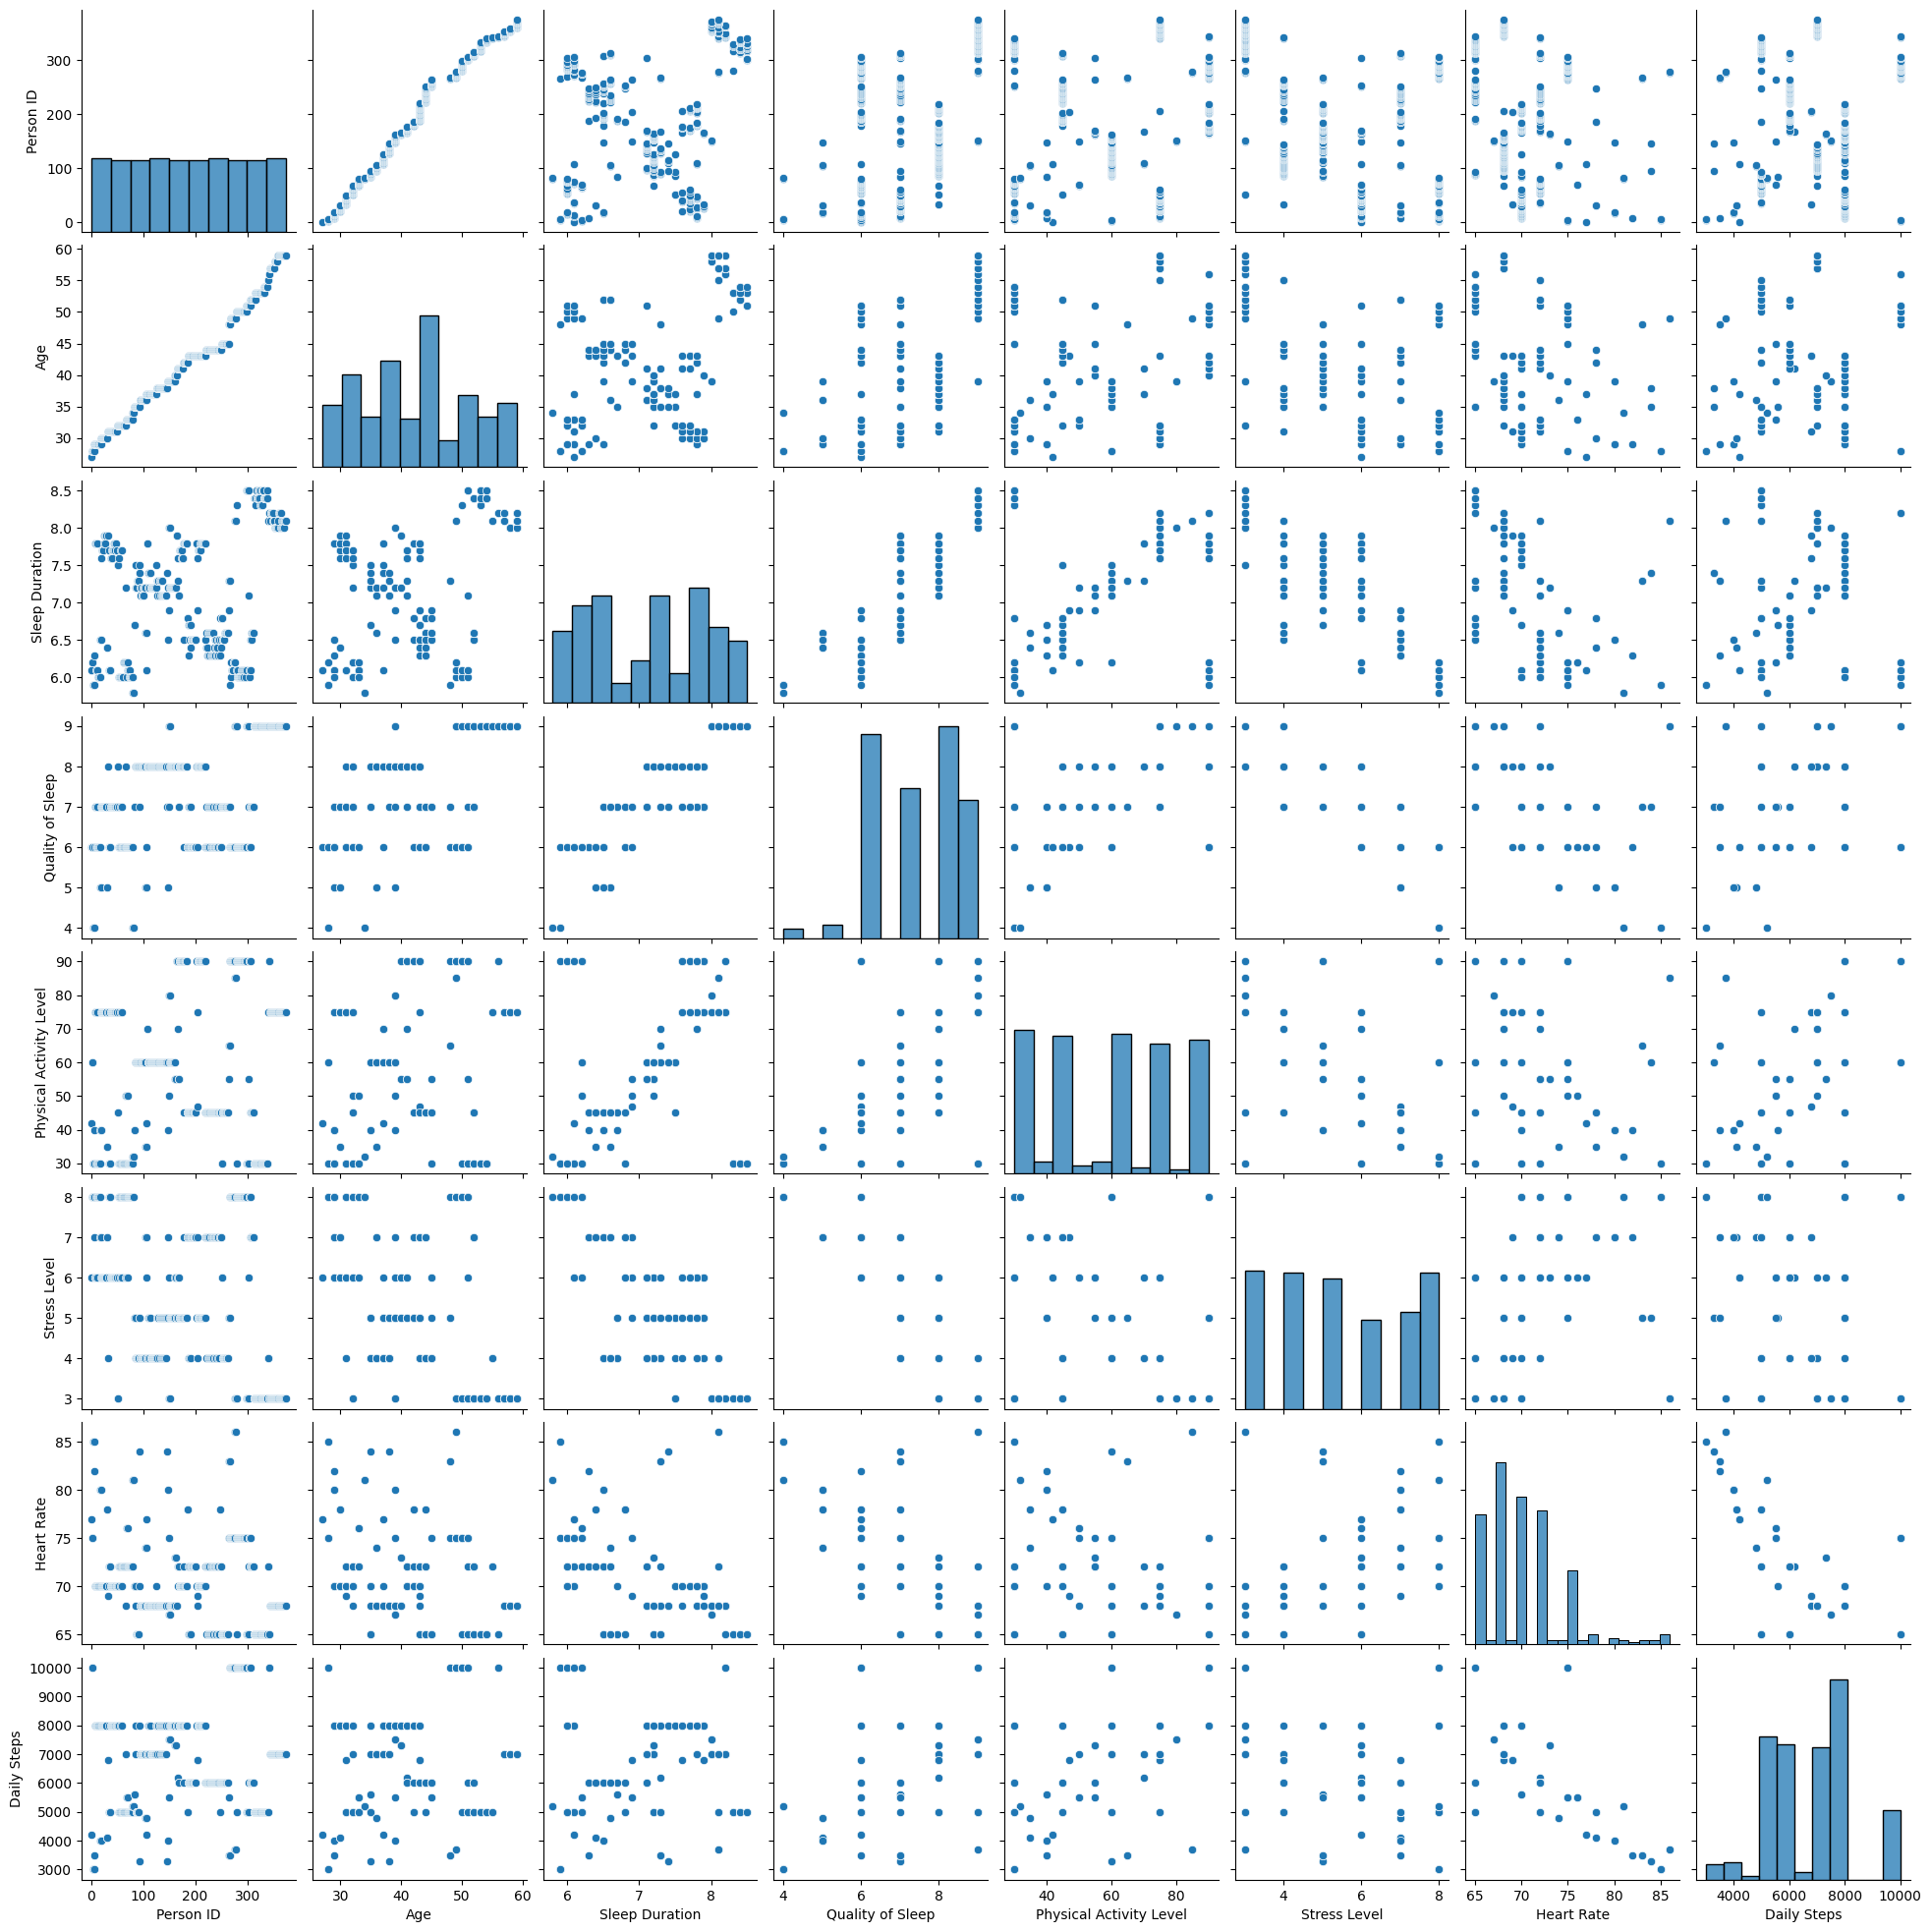

In [ ]:
sns.pairplot(df)
plt.show()

<ipython-input-9-24a3e0a1ce2f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


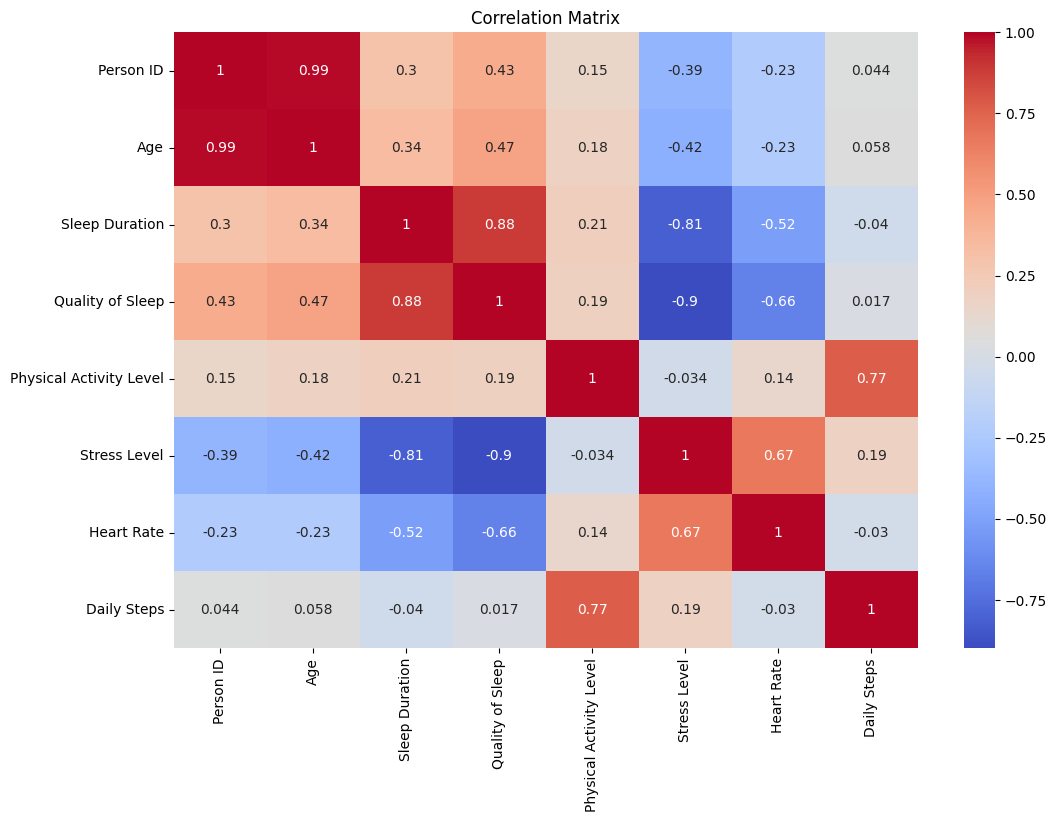

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df.drop('Quality of Sleep', axis=1)
y = df['Quality of Sleep']

In [ ]:
X

,Person ID,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
y

0      6
1      6
2      6
3      4
4      4
      ..
369    9
370    9
371    9
372    9
373    9
Name: Quality of Sleep, Length: 374, dtype: int64

In [ ]:
X.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [ ]:
X= df.drop(['Person ID', 'Heart Rate', 'Daily Steps','Blood Pressure'] ,axis=1, inplace=True)

In [ ]:
X=pd.get_dummies(df, columns=['Occupation', 'BMI Category', 'Sleep Disorder','Gender'], drop_first=True)

In [ ]:
X

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,...,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_None,Sleep Disorder_Sleep Apnea,Gender_Male
0,27,6.1,6,42,6,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,28,6.2,6,60,8,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,6.2,6,60,8,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,28,5.9,4,30,8,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,28,5.9,4,30,8,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
370,59,8.0,9,75,3,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
371,59,8.1,9,75,3,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
372,59,8.1,9,75,3,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import joblib
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', GradientBoostingRegressor())  # Initial model (you can replace this with any model of your choice)
])


In [ ]:
param_grid = {
    'pca__n_components': [2, 3, 4],  # Adjust as needed
    'model': [GradientBoostingRegressor(), BaggingRegressor()]  # Add more models if desired
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'model': [GradientBoostingRegressor(),
                                   BaggingRegressor()],
                         'pca__n_components': [2, 3, 4]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.10039999999999999
R-squared: 0.9334492104642942


In [ ]:
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(best_model.named_steps['scaler'], 'scaler.joblib')
joblib.dump(best_model.named_steps['pca'], 'pca.joblib')

['pca.joblib']